In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import warnings
warnings.filterwarnings('ignore')

import pylab as plt
import seaborn as sns

from scipy import stats
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
train = pd.read_csv('../data/train_cleaned2.csv')
train.head(2)
train.shape

(3428, 61)

In [4]:
test = pd.read_csv('../data/test_cleaned2.csv')
test.head(2)
test.shape

(1389, 57)

# Entrenamiento y testeo del modelo

In [5]:
# entrenamiento del modelo
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

X = train.drop(['price_log', 'price', 'Private room.2', 'Private room.3'], axis=1)
y = train.price_log

regressor = LinearRegression()  
regressor.fit(X, y) #training the algorithm

LinearRegression()

In [5]:
y_pred = regressor.predict(test)

In [6]:
import math

for i in range(len(y_pred)):
    std = round(math.exp(y_pred[i].std()/2), 2)
    y_pred[i] = round(math.exp(y_pred[i]), 2)*std
    
y_pred[:5]

array([115.87, 136.05,  76.34,  97.32,  80.78])

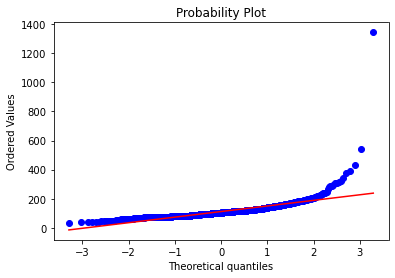

In [7]:
stats.probplot(y_pred, dist="norm", plot=plt)
plt.show()

In [8]:
sample = pd.read_csv('../data/sample.csv')
sample.head(2)

,price,id
0,0,0
1,0,1


In [9]:
sample.price = y_pred

In [10]:
sample.to_csv('../data/linear_pred(d_c2).csv', index = False)

# Testeo del modelo dividiendo el train con test split

In [6]:
#Create Training and Testing data

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)
type(X)

pandas.core.frame.DataFrame

In [12]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [13]:
y_test_preds = regressor.predict(X_test)
y_train_preds = regressor.predict(X_train)

In [14]:
#Scoring the Model

test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

In [15]:
test_score

0.5322097051759652

In [16]:
train_score

0.5394560609331767